Soal no 1 "Akar Persamaan Polusi"

Nama : Muhammad Paruk
NIM : 2802499320

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress
from scipy.integrate import quad
import math

In [22]:
# Fungsi dan turunan
def P(x):
    return x**3 - 4*x**2 + 6*x - 24

def dP(x):
    return 3*x**2 - 8*x + 6

# Metode Bisection (tanpa print)
def bisection(f, a, b, tol=1e-5):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        return None  # Tidak ada akar
    while (b - a) / 2.0 > tol:
        c = (a + b) / 2.0
        fc = f(c)
        if fc == 0:
            return c
        elif fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return (a + b) / 2.0

# Metode Newton-Raphson (tanpa print)
def newton_raphson(f, df, x0, tol=1e-5, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            return None
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Jalankan metode
akar_bisection = bisection(P, 2, 4)
akar_newton = newton_raphson(P, dP, x0=3.5)

# Visualisasi
x_vals = np.linspace(0, 6, 400)
y_vals = P(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='P(x)', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.plot(akar_bisection, P(akar_bisection), 'ro', label='Akar Bisection')
plt.plot(akar_newton, P(akar_newton), 'go', label='Akar Newton-Raphson')
plt.title('Grafik Fungsi P(x) dan Titik Akar')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Soal no 2 "Sistem Linier 3 Titik"

In [23]:
A = np.array([[3, 2, 1], [2, 3, 3], [5, 2, 4]])
b = np.array([10, 13, 20])
solusi_np = np.linalg.solve(A, b)
print(f"Solusi dengan numpy: x = {solusi_np[0]:.4f}, y = {solusi_np[1]:.4f}, z = {solusi_np[2]:.4f}")

def gauss_seidel(A, b, x0=None, tol=1e-2, max_iter=100):
    n = len(b)
    x = np.zeros_like(b) if x0 is None else x0.copy()
    history = [x.copy()]
    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return np.array(history)

iterasi = gauss_seidel(A, b)
akhir = iterasi[-1]
print(f"Hasil Gauss-Seidel: x = {akhir[0]:.4f}, y = {akhir[1]:.4f}, z = {akhir[2]:.4f}")
print(f"Total iterasi: {len(iterasi) - 1}")

plt.plot(iterasi[:, 0], label='x')
plt.plot(iterasi[:, 1], label='y')
plt.plot(iterasi[:, 2], label='z')
plt.title('Konvergensi Gauss-Seidel')
plt.xlabel('Iterasi'); plt.ylabel('Nilai')
plt.grid(True); plt.legend()
plt.show()

Solusi dengan numpy: x = 2.0000, y = 1.0000, z = 2.0000
Hasil Gauss-Seidel: x = 2.0000, y = 1.0000, z = 2.0000
Total iterasi: 8


Soal no 3 "Interpolasi Linear"

In [24]:
suhu = np.array([10, 15, 20, 25, 30])
polutan = np.array([2.5, 2.1, 1.8, 1.3, 1.1])
f_interp = interp1d(suhu, polutan)
estimasi = f_interp(22)

print(f"Estimasi kadar polutan pada 22°C: {estimasi:.3f} mg/L")

plt.scatter(suhu, polutan, color='blue', label='Data')
plt.plot(suhu, f_interp(suhu), color='orange', label='Interpolasi')
plt.scatter(22, estimasi, color='red', s=80, label='Titik 22°C')
plt.title('Interpolasi Polutan terhadap Suhu')
plt.xlabel('Suhu (°C)'); plt.ylabel('Polutan (mg/L)')
plt.grid(True); plt.legend()
plt.show()

Estimasi kadar polutan pada 22°C: 1.600 mg/L


Soal no 4 "Regresi Linear"

In [25]:
slope, intercept, *_ = linregress(suhu, polutan)
regresi = slope * suhu + intercept
print(f"Persamaan regresi: y = {slope:.4f}x + {intercept:.4f}")
print("Interpretasi: Polusi menurun saat suhu naik (kemiringan negatif).")

plt.scatter(suhu, polutan, color='blue', label='Data')
plt.plot(suhu, regresi, color='green', label='Garis Regresi')
plt.title('Regresi Linear Suhu vs Polutan')
plt.xlabel('Suhu (°C)'); plt.ylabel('Polutan (mg/L)')
plt.grid(True); plt.legend()
plt.show()

Persamaan regresi: y = -0.0720x + 3.2000
Interpretasi: Polusi menurun saat suhu naik (kemiringan negatif).


Soal no 5 "Diferensiasi Suhu"

In [26]:
x = np.linspace(0, 24, 100)
T = lambda x: 25 + 5 * np.sin(x)
dT_exact = lambda x: 5 * np.cos(x)
h = x[1] - x[0]
dT_numeric = np.diff(T(x)) / h
x_diff = x[:-1]

plt.plot(x, dT_exact(x), label='Turunan Eksak')
plt.plot(x_diff, dT_numeric, '--', label='Forward Difference')
plt.title('Diferensiasi Suhu Air')
plt.xlabel('Jam'); plt.ylabel('dT/dx')
plt.grid(True); plt.legend()
plt.show()

Soal no 6 "Integrasi Polutan Harian"

In [27]:
x = np.linspace(0, 24, 1000)
P = lambda x: 2 + np.sin(x / 24 * 2 * np.pi)
y = P(x)
dx = x[1] - x[0]
left = np.sum(y[:-1]) * dx
right = np.sum(y[1:]) * dx
mid = np.sum(P((x[:-1] + x[1:]) / 2)) * dx
trapezoidal = np.trapz(y, x)

print("\nSoal 6:")
print(f"Riemann Left  : {left:.4f}")
print(f"Riemann Right : {right:.4f}")
print(f"Riemann Mid   : {mid:.4f}")
print(f"Trapezoidal   : {trapezoidal:.4f}")

plt.plot(x, y, label='P(x)')
plt.fill_between(x, y, alpha=0.3)
plt.title('Integrasi Total Polutan Sehari')
plt.xlabel('Jam'); plt.ylabel('P(x)')
plt.grid(True); plt.legend()
plt.show()

<ipython-input-27-c0ba9b0aeb3f>:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  trapezoidal = np.trapz(y, x)



Soal 6:
Riemann Left  : 48.0000
Riemann Right : 48.0000
Riemann Mid   : 48.0000
Trapezoidal   : 48.0000


Soal no 7 "ODE Pemurnian Sungai"


Soal 7:
t=0, Euler: 10.0000, Eksak: 10.0000
t=1, Euler: 5.0000, Eksak: 6.0653
t=2, Euler: 2.5000, Eksak: 3.6788
t=3, Euler: 1.2500, Eksak: 2.2313
t=4, Euler: 0.6250, Eksak: 1.3534
t=5, Euler: 0.3125, Eksak: 0.8208
t=6, Euler: 0.1562, Eksak: 0.4979
t=7, Euler: 0.0781, Eksak: 0.3020
t=8, Euler: 0.0391, Eksak: 0.1832
t=9, Euler: 0.0195, Eksak: 0.1111
t=10, Euler: 0.0098, Eksak: 0.0674


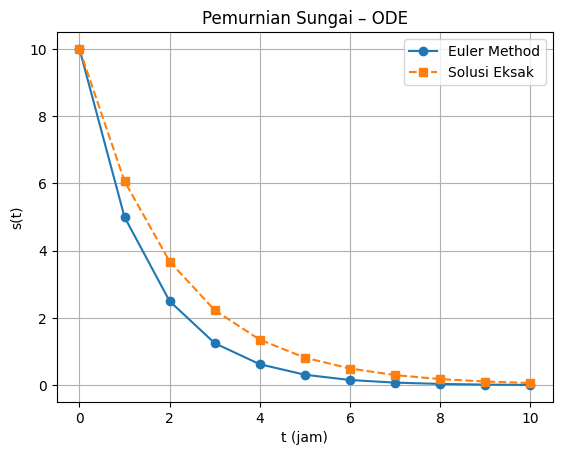

In [28]:
t = np.arange(0, 11, 1)
s = np.zeros_like(t, dtype=float)
s[0] = 10
for i in range(1, len(t)):
    s[i] = s[i-1] + 1 * (-0.5 * s[i-1])
s_exact = 10 * np.exp(-0.5 * t)

print("\nSoal 7:")
for i in range(len(t)):
    print(f"t={t[i]}, Euler: {s[i]:.4f}, Eksak: {s_exact[i]:.4f}")

plt.plot(t, s, 'o-', label='Euler Method')
plt.plot(t, s_exact, 's--', label='Solusi Eksak')
plt.title('Pemurnian Sungai – ODE')
plt.xlabel('t (jam)'); plt.ylabel('s(t)')
plt.grid(True); plt.legend()
plt.show()